In [ ]:
from google.colab import drive
drive.mount('/content/drive')

TIMEOUT: ignored

In [ ]:
!unzip "/content/drive/MyDrive/CelebAMask-HQ.zip"

Streaming output truncated to the last 5000 lines.
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_neck.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_nose.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_r_brow.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_r_eye.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_skin.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_u_lip.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_hair.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_l_brow.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_l_eye.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_l_lip.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_mouth.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_neck.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_nose.png  
  inflating: CelebAMask-HQ/Cel

In [ ]:
import os
import cv2
import glob
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
label_list = ['skin','l_eye', 'r_eye', 'u_lip', 'l_lip','hair','l_brow','mouth','neck_l','neck','nose','cloth','ear_r','l_ear','r_brow','r_ear','hat','eye_g']

In [ ]:
os.chdir('/content/CelebAMask-HQ')

In [ ]:
folder_base = 'CelebAMask-HQ-mask-anno'
folder_save = 'masked'

In [ ]:
number_of_images =30000

In [ ]:
def folderformasked(path):
    if not os.path.exists(os.path.join(path)):
        os.makedirs(os.path.join(path))


folderformasked(folder_save)

In [ ]:

for i in range(number_of_images):    
    number_of_folder = i // 2000
    im_base = np.zeros((512, 512))
  #check empty mask
    is_empty = True
    for idx, label in enumerate(label_list):      
        filename = os.path.join(folder_base, str(number_of_folder), str(i).rjust(5, '0') + '_' + label + '.png')

        if os.path.exists(filename.strip(' ')):
            is_empty = False 
            im = cv2.imread(filename)
            im = im[:, :, 0]
            im_base[im != 0] = idx+10

    if not is_empty:
        # save as an image
        filename_save = os.path.join(folder_save, str(i) + '.png')
        print(filename_save)
        cv2.imwrite(filename_save, im_base)

masked/0.png
masked/1.png
masked/2.png
masked/3.png
masked/4.png
masked/5.png
masked/6.png
masked/7.png
masked/8.png
masked/9.png
masked/10.png
masked/11.png
masked/12.png
masked/13.png
masked/14.png
masked/15.png
masked/16.png
masked/17.png
masked/18.png
masked/19.png
masked/20.png
masked/21.png
masked/22.png
masked/23.png
masked/24.png
masked/25.png
masked/26.png
masked/27.png
masked/28.png
masked/29.png
masked/30.png
masked/31.png
masked/32.png
masked/33.png
masked/34.png
masked/35.png
masked/36.png
masked/37.png
masked/38.png
masked/39.png
masked/40.png
masked/41.png
masked/42.png
masked/43.png
masked/44.png
masked/45.png
masked/46.png
masked/47.png
masked/48.png
masked/49.png
masked/50.png
masked/51.png
masked/52.png
masked/53.png
masked/54.png
masked/55.png
masked/56.png
masked/57.png
masked/58.png
masked/59.png
masked/60.png
masked/61.png
masked/62.png
masked/63.png
masked/64.png
masked/65.png
masked/66.png
masked/67.png
masked/68.png
masked/69.png
masked/70.png
masked/71.png
ma

KeyboardInterrupt: ignored

In [ ]:
from torch.utils.data import Dataset, DataLoader
class CelebAHQ(Dataset):
    def __init__(self, parent_dir, image_dir, mask_dir, image_transform, mask_transform):
        self.mask_list = glob.glob(parent_dir+'/'+mask_dir+'/*')
        self.mask_list.sort()
        self.image_list = []
        for path in self.mask_list:
            self.image_list.append(path.replace('.png', '.jpg').replace(mask_dir, image_dir))
        self.mask_list = self.mask_list

        self.image_transform = image_transform
        self.mask_transform = mask_transform
                
    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, index):
        img = Image.open(self.image_list[index]).convert('RGB')
        img = image_transform(img)
        
        mask = Image.open(self.mask_list[index]).convert('L')
        mask_present = mask_transform(mask)

        mask_present = mask_present.type(torch.BoolTensor)
        mask_not_present = torch.bitwise_not(mask_present)
        mask = torch.cat([mask_not_present, mask_present], dim=0)
        
        return img, mask

In [ ]:
from torchvision import transforms
image_transform = transforms.Compose([transforms.Resize((256, 256), 2),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])         
mask_transform = transforms.Compose([transforms.Resize((256, 256), 2),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor()])

dataset = CelebAHQ('.', 'CelebA-HQ-img', 'masked', image_transform, mask_transform)


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [ ]:
len(dataset)

30000

In [ ]:
def train_val_test_split(dataset):
    train_dataset = torch.utils.data.Subset(dataset, range(0, int(0.8 * len(dataset))))
    val_dataset = torch.utils.data.Subset(dataset, range(int(0.8*len(dataset)), int(0.9*len(dataset))))
    test_dataset = torch.utils.data.Subset(dataset, range(int(0.9*len(dataset)), len(dataset)))
    return train_dataset, val_dataset, test_dataset

In [ ]:
import torch
from torch import nn
batch_size = 32
train_dataset, val_dataset, test_dataset = train_val_test_split(dataset)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, drop_last=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size = batch_size, drop_last=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, drop_last=True, num_workers=4, pin_memory=True)

In [ ]:
len(train_loader)

750

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking = True)

class DeviceDataLoader():
    # Wrap a dataloader to move data to a device
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
    # Yield a batch of data after moving it to device
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
len(val_loader)  

93

In [ ]:
def IOU(target, predicted): 
    iou_sum = 0
    for i in range(target.shape[0]):
        target_arr = target[i, :, :, :].clone().detach().cpu().numpy().argmax(0)
        predicted_arr = predicted[i, :, :, :].clone().detach().cpu().numpy().argmax(0)
        
        intersection = np.logical_and(target_arr, predicted_arr).sum()
        union = np.logical_or(target_arr, predicted_arr).sum()
        if union == 0:
            iou_score = 0
        else :
            iou_score = intersection / union
        iou_sum +=iou_score
        
    mean_iou = iou_sum/target.shape[0]
    return mean_iou

def pixel_accuracy_(target, predicted):     
    accuracy_sum=0
    for i in range(target.shape[0]):
        target_arr = target[i, :, :, :].clone().detach().cpu().numpy().argmax(0)
        predicted_arr = predicted[i, :, :, :].clone().detach().cpu().numpy().argmax(0)
        
        same = (target_arr == predicted_arr).sum()
        a, b = target_arr.shape
        total = a*b
        accuracy_sum += same/total
    
    pixel_accuracy = accuracy_sum/target.shape[0]        
    return pixel_accuracy

In [ ]:
import torchvision.models as models
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
class DeepLabv3(nn.Module):
    def __init__(self):
        super(DeepLabv3, self).__init__()
        self.deep_lab_v3 = models.segmentation.deeplabv3_resnet50(pretrained=0, 
                                                 progress=1)
        
        self.deep_lab_v3.classifier = DeepLabHead(2048, 2)
        
    def forward(self, input):
        output = self.deep_lab_v3(input)['out']
        return output

model = DeepLabv3()
to_device(model, device)

DeepLabv3(
  (deep_lab_v3): DeepLabV3(
    (backbone): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCEWithLogitsLoss()
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.8)

In [ ]:
def fit(epochs, optimizer, lr_scheduler, model, loss_fn, train_loader, val_loader, last_ckpt_path = None):   
    tr_loss_arr = []
    val_loss_arr = []
    meanioutrain = []
    pixelacctrain = []
    meanioutest = []
    pixelacctest = []
    prev_epoch = 0
    
    if last_ckpt_path != None :
        checkpoint = torch.load(last_ckpt_path)
        prev_epoch = checkpoint['epoch']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        for state in optimizer.state.values():
            for k, v in state.items():
                if isinstance(v, torch.Tensor):
                    state[k] = to_device(v, device)
                    tr_loss_arr =  checkpoint['Training Loss']
        val_loss_arr =  checkpoint['Validation Loss']
        meanioutrain =  checkpoint['MeanIOU train']
        pixelacctrain =  checkpoint['PixelAcc train']
        meanioutest =  checkpoint['MeanIOU test']
        pixelacctest =  checkpoint['PixelAcc test']
        to_device(model, device)
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        pixelacc = 0
        meaniou = 0
        
        pbar = tqdm(train_loader, total = len(train_loader))
        for input, mask in pbar:
            torch.cuda.empty_cache()
            model.train()
            input = input.float()
            mask = mask.float()
            pred = model(input)
            loss = loss_fn(pred, mask)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            tr_loss_arr.append(loss.item())
            meanioutrain.append(IOU(mask, pred))
            pixelacctrain.append(pixel_accuracy_(mask, pred))
            pbar.set_postfix({'Epoch':epoch+1+prev_epoch, 
                              'Training Loss': np.mean(tr_loss_arr),
                              'Mean IOU': np.mean(meanioutrain),
                              'Pixel Acc': np.mean(pixelacctrain)})
            
        with torch.no_grad():
            
            val_loss = 0
            pbar = tqdm(val_loader, total = len(val_loader))
            for input, mask in pbar:
                torch.cuda.empty_cache()
                input = input.float()
                mask = mask.float()
                model.eval()
                pred = model(input)
                
                val_loss_arr.append(loss_fn(pred, mask).item())
                pixelacctest.append(pixel_accuracy_(mask, pred))
                meanioutest.append(mean_IOU(mask, pred))
                
                pbar.set_postfix({'Epoch':epoch+1+prev_epoch, 
                                  'Validation Loss': np.mean(val_loss_arr),
                                  'Mean IOU': np.mean(meanioutest),
                                  'Pixel Acc': np.mean(pixelacctest)
                                 })
        
        checkpoint = {
            'epoch':epoch+1+prev_epoch,
            'state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'Training Loss': tr_loss_arr,
            'Validation Loss':val_loss_arr,
            'MeanIOU train':meanioutrain, 
            'PixelAcc train':pixelacctrain, 
            'MeanIOU test':meanioutest, 
            'PixelAcc test':pixelacctest
        }
        torch.save(checkpoint, f"{epoch+1+prev_epoch}.pth")
        lr_scheduler.step()
        
    return tr_loss_arr, val_loss_arr, meanioutrain, pixelacctrain, meanioutest, pixelacctest

In [ ]:
from PIL import Image

In [ ]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

In [ ]:
fit_ = [fit(1, optimizer, lr_scheduler, model, loss_fn, train_loader, val_loader)]

  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

In [ ]:
def load_checkpoint(path): 
    model = DeepLabv3()
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    return model

In [ ]:
def get_prediction(path_img, path_model):
    img = Image.open(path_img)
    
    transform = transforms.Compose([transforms.Resize((224, 224), 2),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # imagenet stats
    input_img = transform(img)
    
    with torch.no_grad():
        model = to_device(load_checkpoint(path_model), device)
        input_img = to_device(input_img, device).float()
        ytest = model(input_img.unsqueeze(0).float())
        ypos = ytest[0, 1, :, :].clone().detach().cpu().numpy() # positive segmentation mask
        yneg = ytest[0, 0, :, :].clone().detach().cpu().numpy() # negative segmentation mask
        ytest = ypos >= yneg  # combining both
    
    mask = ytest.astype('float32')
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.dilate(mask,kernel,iterations = 2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return mask

In [ ]:

def get_mask_on_image(image, mask):
    color_mask = np.zeros_like(image)
    color_mask[:, :, 1] += mask.astype('uint8') * x
    masked = cv2.addWeighted(image, 0.5, color_mask, 0.5 ,0.0)
    return masked

In [ ]:
def print_prediction(path_img,path_model):
    img = cv2.imread(path_img)
    img = cv2.resize(img, (224, 224))
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = get_prediction(path_img, path_model)

    mask_on_img = get_mask_on_image(rgb_img, mask)

    fig = plt.figure()
    a = fig.add_subplot(1,3,1)
    imgplot = plt.imshow(rgb_img)
    a.set_title('Input')
    a = fig.add_subplot(1,3,2)
    imgplot = plt.imshow(mask)
    a.set_title('Output')
    a = fig.add_subplot(1,3,3)
    imgplot = plt.imshow(mask_on_img)
    a.set_title('Output')

In [ ]:
@torch.no_grad()
def get_test_score(test_loader):
    val_loss = 0
    val_loss_arr = []
    pixelacctest = []
    meanioutest = []
    pbar = tqdm(val_loader, total = len(val_loader))
    for input, mask in pbar:
        torch.cuda.empty_cache()
        input = input.float()
        mask = mask.float()
        model.eval()
        pred = model(input)
        
        val_loss_arr.append(loss_fn(pred, mask).item())
        pixelacctest.append(pixel_acc(mask, pred))
        meanioutest.append(mean_IOU(mask, pred))
        
        pbar.set_postfix({'Validation Loss': np.mean(val_loss_arr),
                          'Mean IOU': np.mean(meanioutest),
                          'Pixel Acc': np.mean(pixelacctest)
                          })

In [ ]:

def get_example_preds(base_file_path, model_path):
    for i in range(3):
        print_prediction(f"{base_file_path}/{i}.jpg", model_path)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


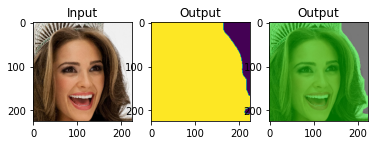

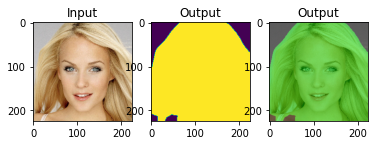

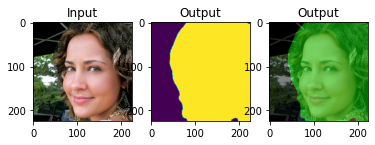

In [ ]:
import matplotlib.pyplot as plt
get_example_preds('/content/CelebAMask-HQ/CelebA-HQ-img', '/content/CelebAMask-HQ/1.pth')